In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [63]:
data = pd.read_csv('xgb_results.csv')
data['partition'] = np.where(data['dep_delayed_15min']==1, 'y_true', np.where(data['predict']==1,'y_pred','error'))
data = data.drop(columns=['Unnamed: 0'])

In [64]:
data[data['UniqueCarrier']==20].head(50)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h,DepTime_m,UC_Origin,UC_Dest,Origin_DepTime,UC_DepTime,predict_proba,predict,error
4,10,7,6,20,182,210,423,1.0,y_true,18,28,1646,1661,2604,2604,0.282423,0,Y
11,3,5,7,20,222,276,1262,0.0,error,12,5,1657,1682,3229,3229,0.147980,0,N
25,4,4,1,20,269,222,647,0.0,error,6,35,1670,1667,3902,3902,0.012905,0,N
27,4,16,7,20,77,21,189,0.0,error,12,35,1625,1624,1078,1078,0.104059,0,N
36,5,6,5,20,249,269,480,1.0,y_true,17,28,1663,1680,3578,3578,0.378871,0,Y
43,4,18,1,20,258,222,1107,0.0,error,12,0,1666,1667,3710,3710,0.187812,0,N
45,11,10,4,20,264,161,308,0.0,error,18,25,1668,1650,3815,3815,0.240868,0,N
59,6,7,3,20,37,267,291,0.0,error,10,20,1618,1679,500,500,0.109485,0,N
63,1,27,5,20,49,234,328,0.0,error,14,35,1621,1669,671,671,0.188039,0,N
68,7,25,2,20,81,182,895,0.0,error,17,23,1626,1656,1149,1149,0.307541,0,N


In [65]:
plt.subplots?

<AxesSubplot:xlabel='Dest', ylabel='count'>

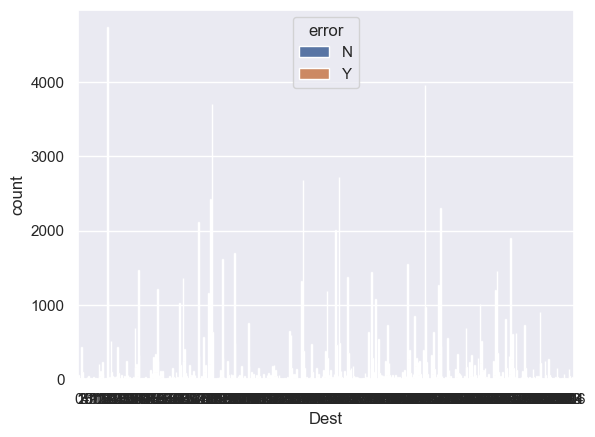

In [59]:
sns.countplot(x='Dest', hue='error', data=data)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

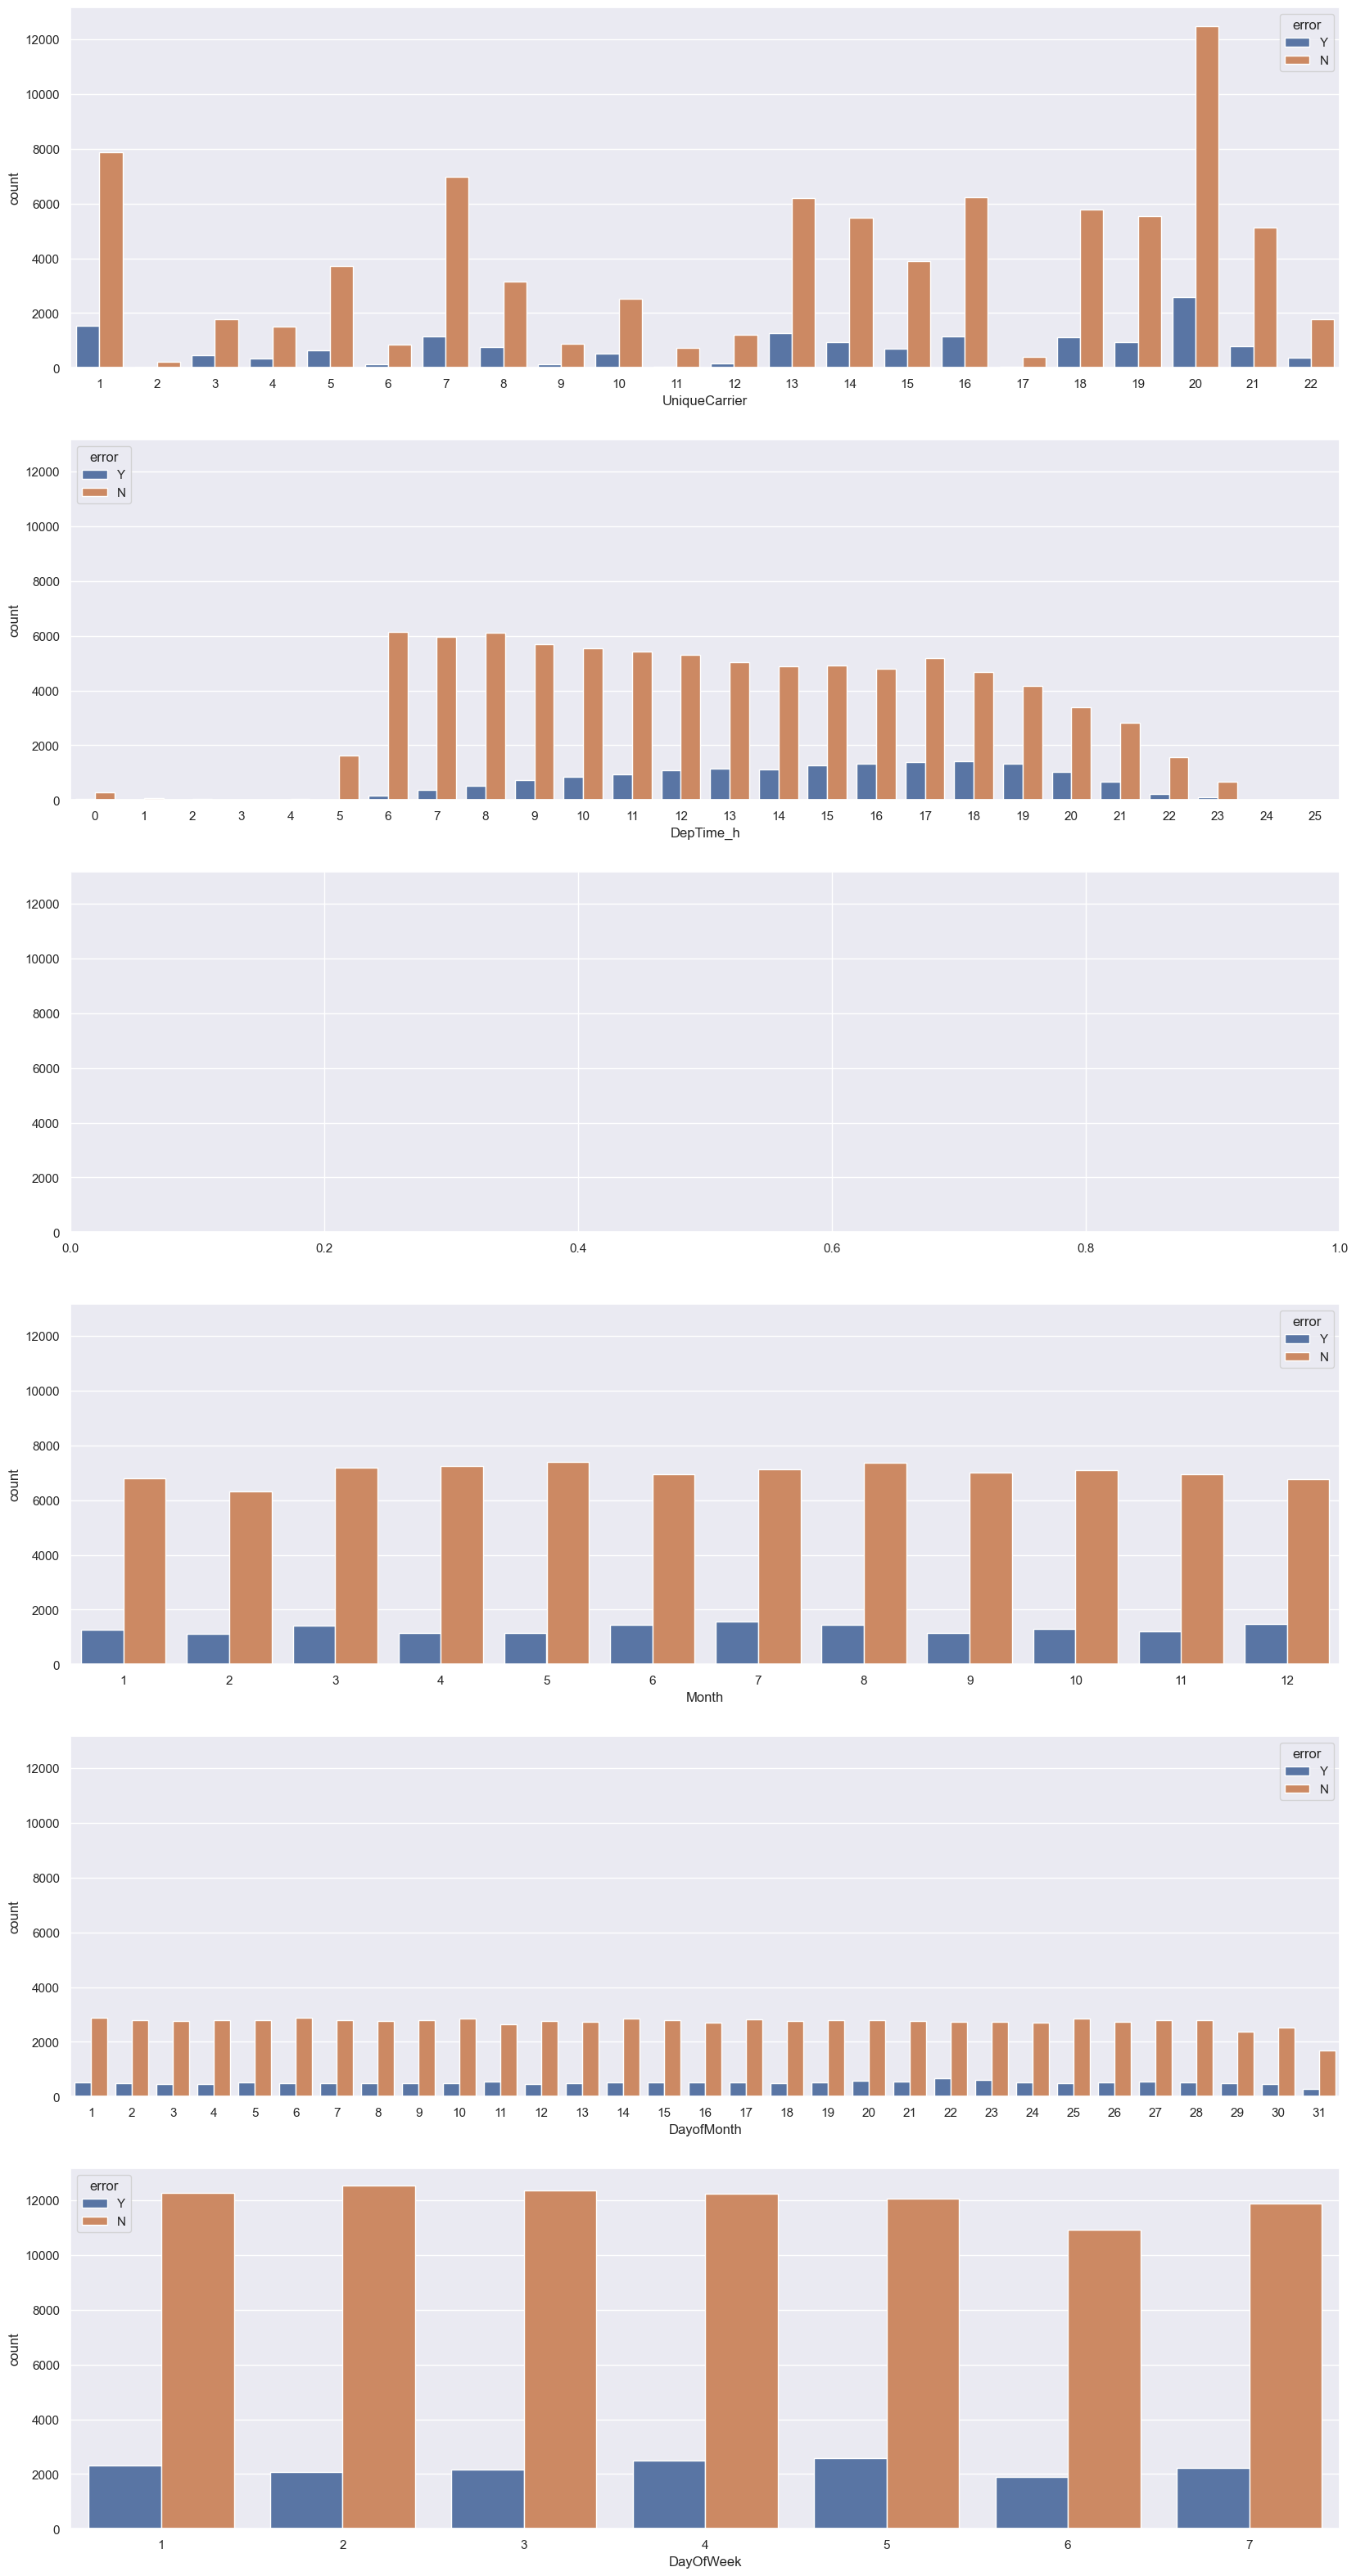

In [66]:
hue='error'
_,axes = plt.subplots(6, 1, sharey=True, figsize=(20, 40))
sns.countplot(x='UniqueCarrier', hue=hue, data=data, ax=axes[0])
sns.countplot(x='DepTime_h', hue=hue, data=data, ax=axes[1])
sns.countplot(x='Month', hue=hue, data=data, ax=axes[3])
sns.countplot(x='DayofMonth', hue=hue, data=data, ax=axes[4])
sns.countplot(x='DayOfWeek', hue=hue, data=data, ax=axes[5])

In [48]:
data['DepTime'].unique().shape


(1104,)

In [35]:
pv=data[data['dep_delayed_15min']==1].pivot_table(index='Month', columns='UniqueCarrier', values='dep_delayed_15min', aggfunc='count')

In [36]:
pv.shape

(12, 22)

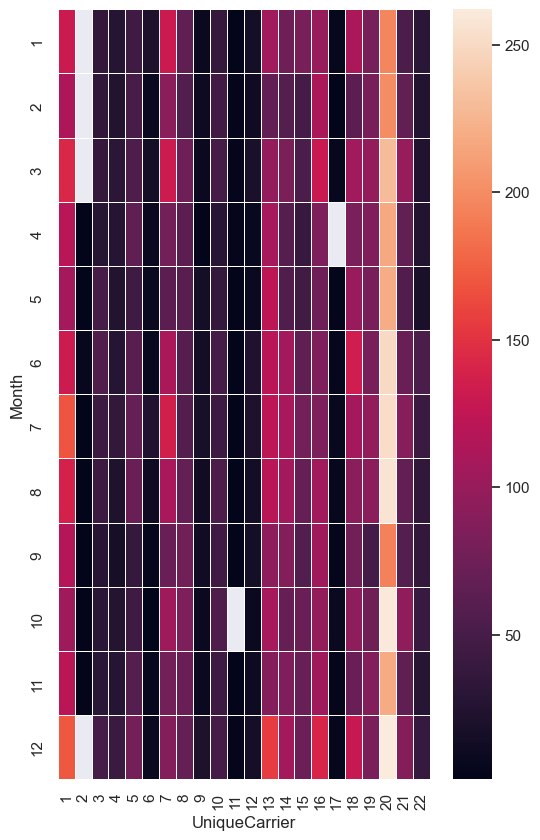

In [39]:
plt.figure(figsize=(6, 10))
sns.heatmap(pv, fmt=".1f", linewidths=0.5);

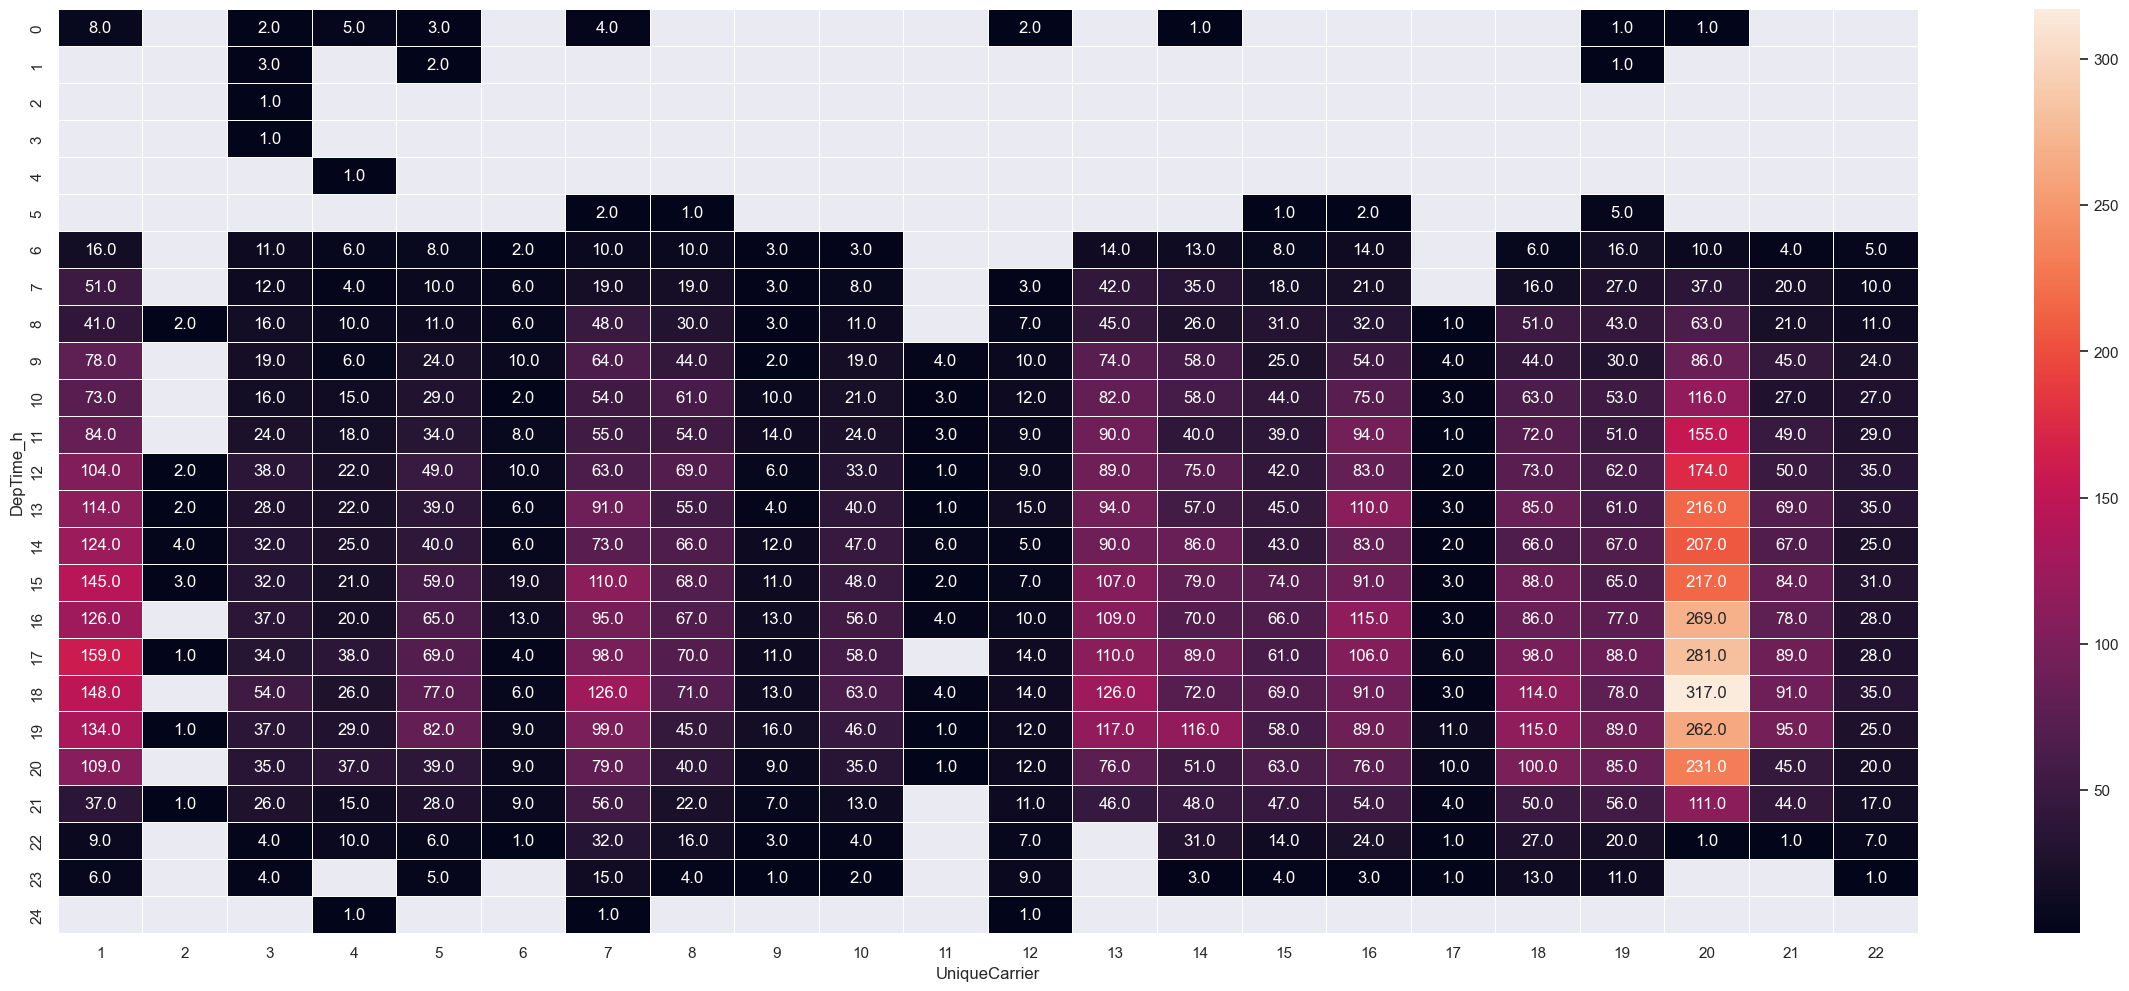

In [44]:
pv=data[data['dep_delayed_15min']==1].pivot_table(
    index='DepTime_h', columns='UniqueCarrier', values='dep_delayed_15min', aggfunc='count'
)
plt.figure(figsize=(30, 12))
sns.heatmap(pv, fmt=".1f", linewidths=0.5,annot=True);

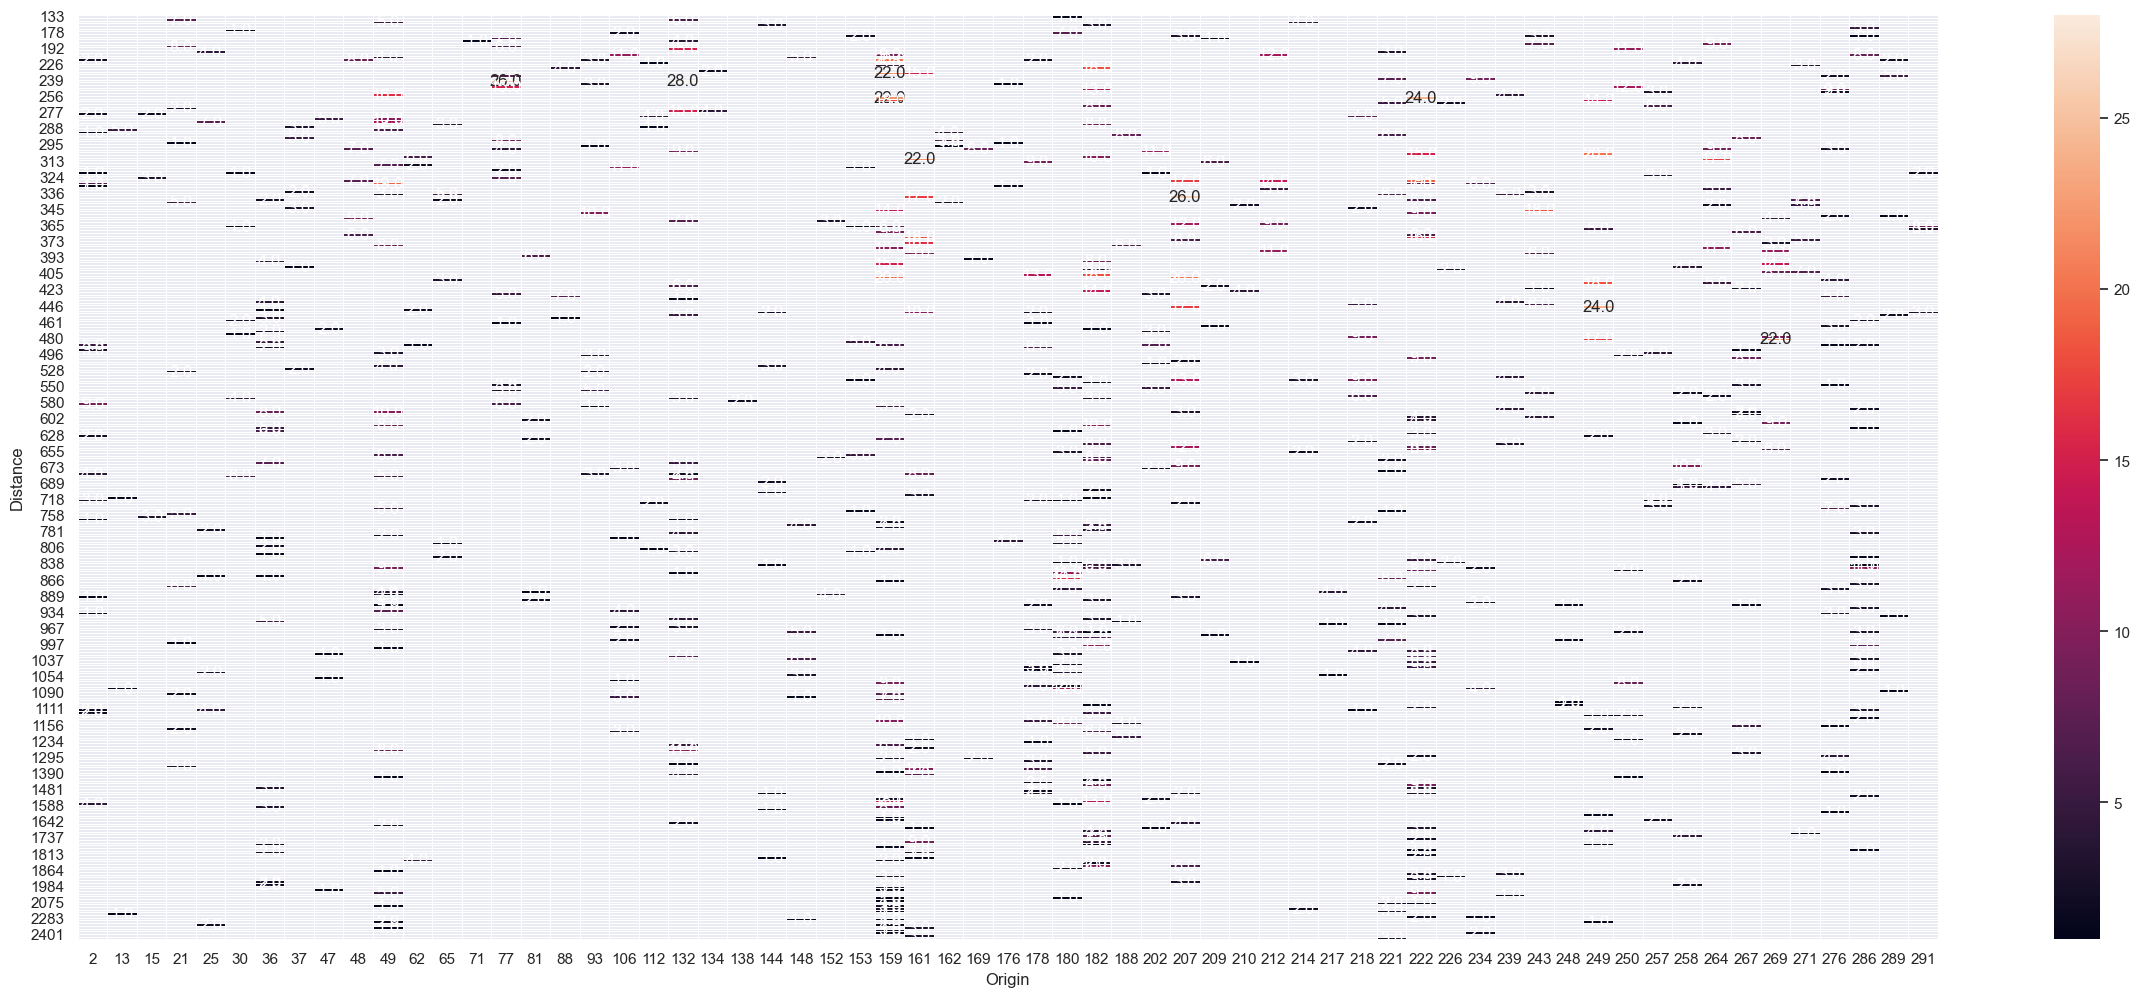

In [73]:
pv=data[(data['dep_delayed_15min']==1)&(data['UniqueCarrier']==20)].pivot_table(
    index='Distance', columns='Origin', values='dep_delayed_15min', aggfunc='count'
)
plt.figure(figsize=(30, 12))
sns.heatmap(pv, fmt=".1f", linewidths=0.5,annot=True);

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

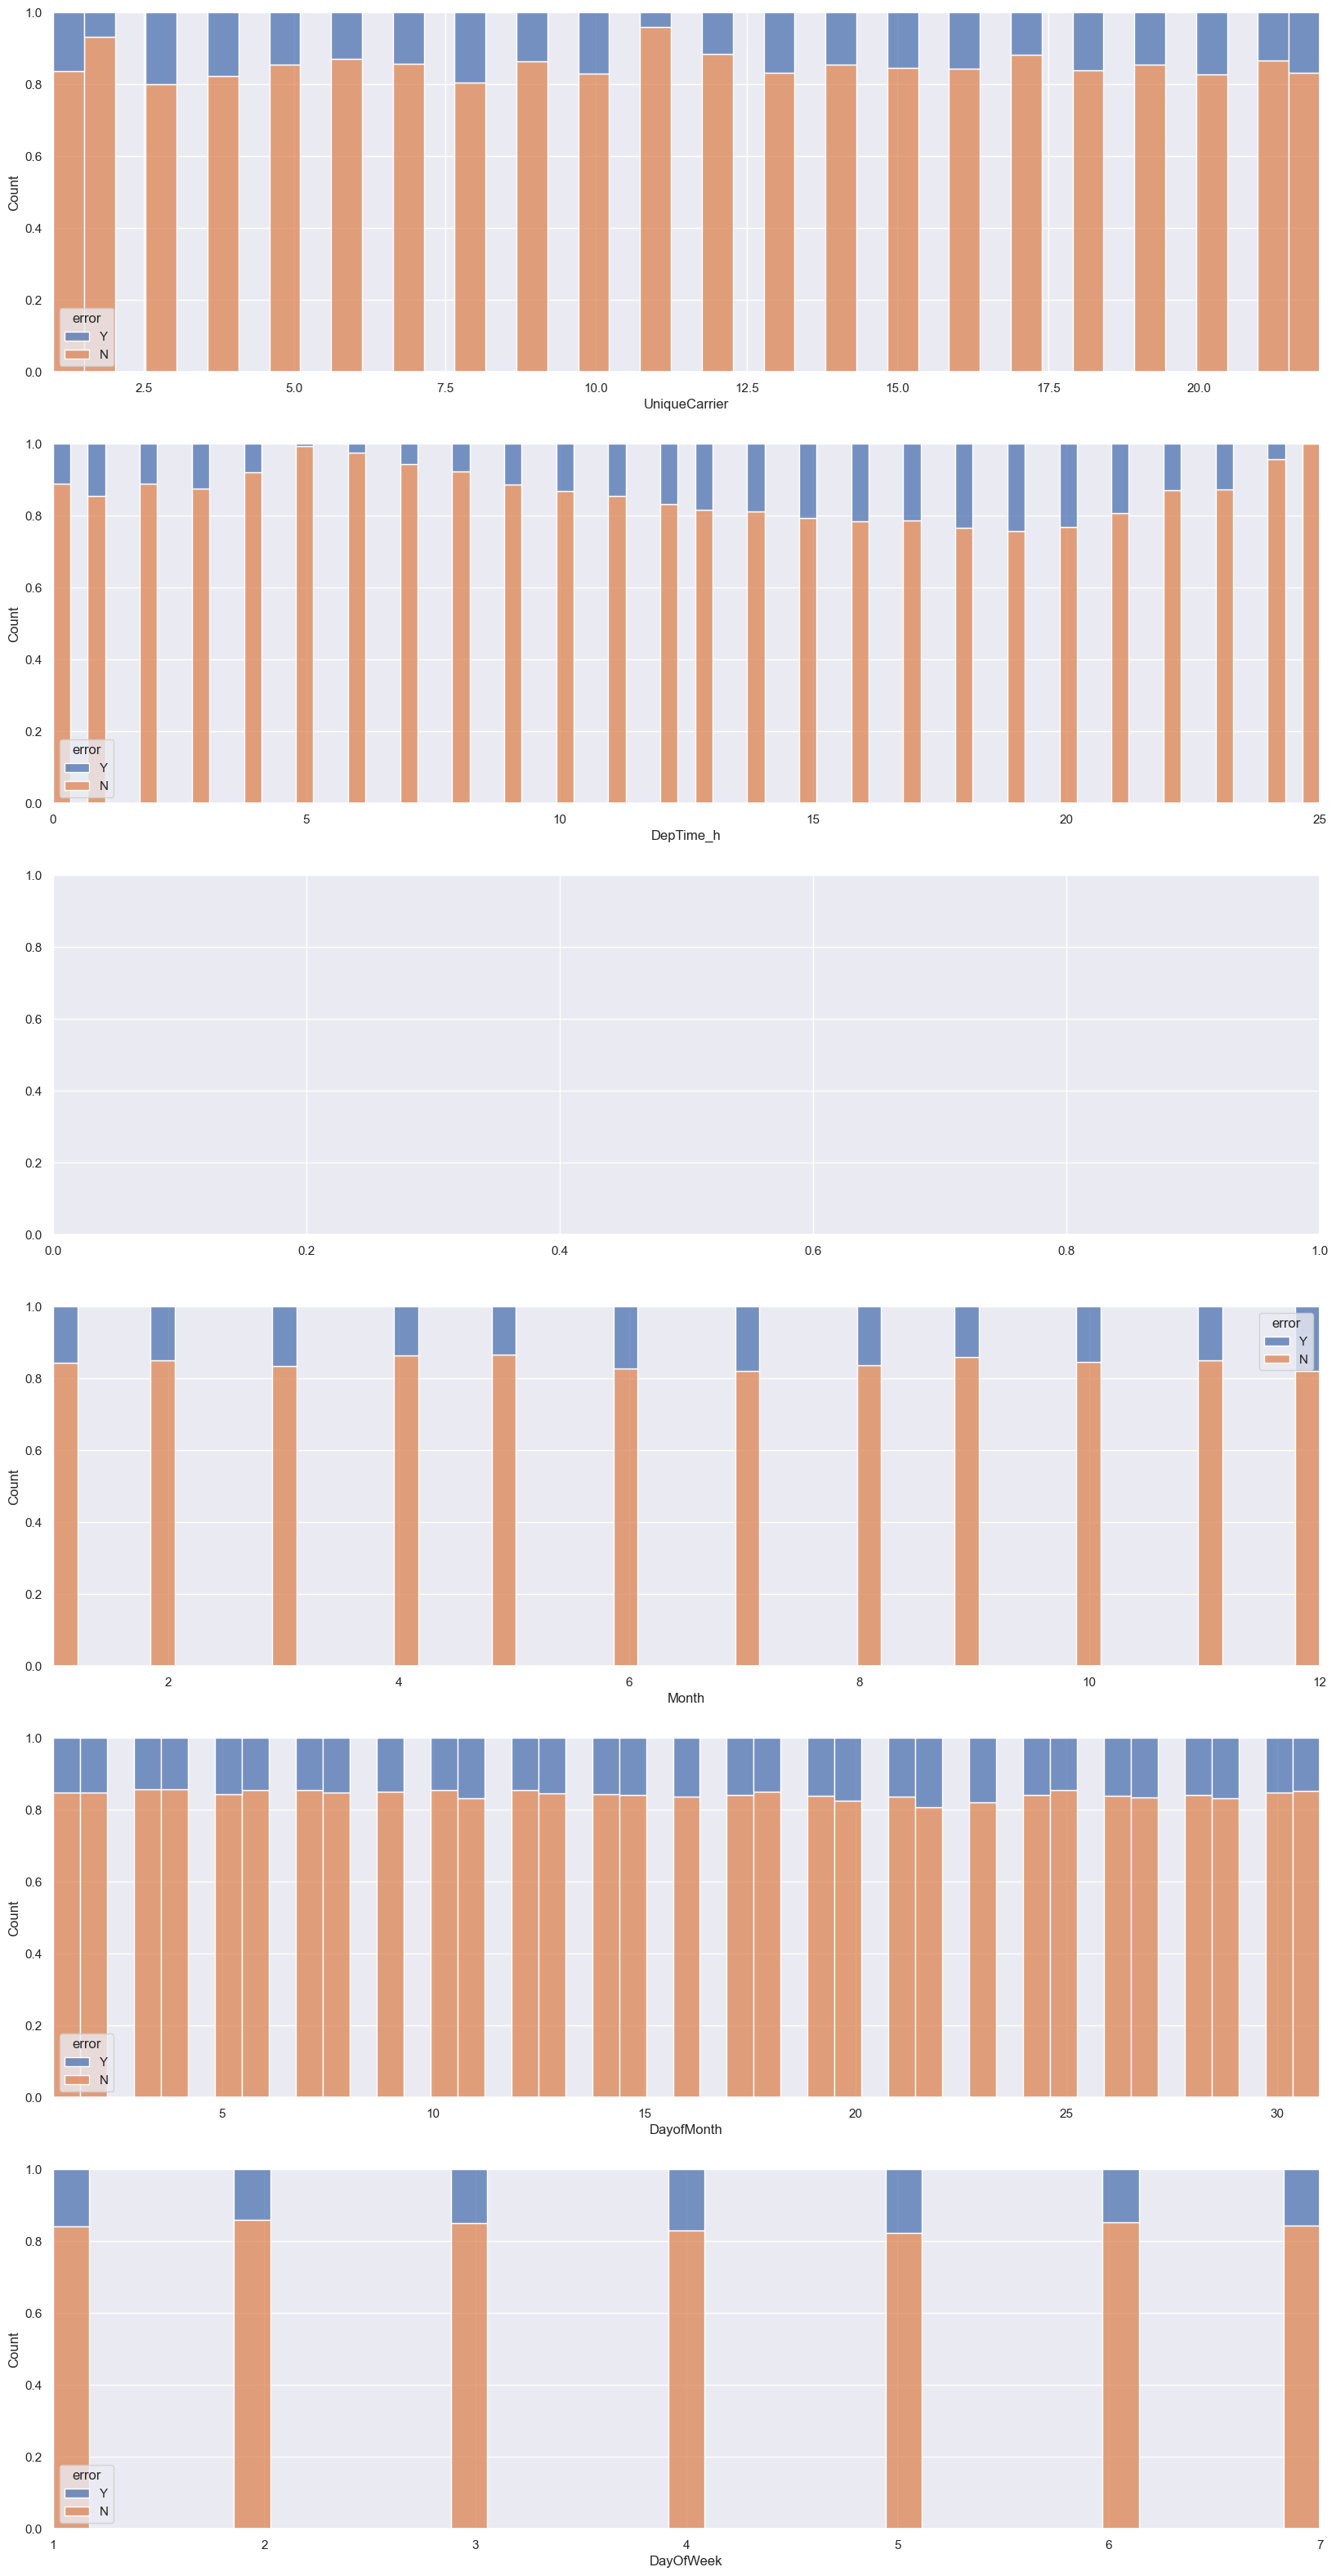

In [67]:
hue='error'
_,axes = plt.subplots(6, 1, sharey=True, figsize=(20, 40))
sns.histplot(x='UniqueCarrier', hue=hue, data=data, ax=axes[0],multiple="fill", stat="count")
sns.histplot(x='DepTime_h', hue=hue, data=data, ax=axes[1],multiple="fill", stat="count")
sns.histplot(x='Month', hue=hue, data=data, ax=axes[3],multiple="fill", stat="count")
sns.histplot(x='DayofMonth', hue=hue, data=data, ax=axes[4],multiple="fill", stat="count")
sns.histplot(x='DayOfWeek', hue=hue, data=data, ax=axes[5],multiple="fill", stat="count")
